In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import json
import matplotlib.pyplot as plt

In [20]:
with open("Sarcasm_Headlines_Dataset.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])


labels

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [3]:
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [4]:
vocab_size = 64
oov_token = "<oov>"

tokenizer = Tokenizer(
    num_words=vocab_size,
    oov_token=oov_token
)

In [5]:
tokenizer.fit_on_texts(training_sentences)

In [19]:
max_length=16

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(
    training_sequences,
    maxlen=max_length,
    padding='post'
)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(
    testing_sequences,
    maxlen=max_length,
    padding='post'
)

In [7]:
embedding_dim = 1

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
import numpy as np

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [9]:
training_sequences[0], training_labels[0]

([1, 1, 1, 1, 1, 47, 1, 1, 1, 6, 1, 1], 0)

In [10]:
num_epochs=100

history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels))

Epoch 1/100
625/625 [==============================] - 3s 3ms/step - loss: 0.5999 - accuracy: 0.6504 - val_loss: 0.5162 - val_accuracy: 0.7237
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5145 - accuracy: 0.7279 - val_loss: 0.5136 - val_accuracy: 0.7277
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5122 - accuracy: 0.7308 - val_loss: 0.5187 - val_accuracy: 0.7183
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5112 - accuracy: 0.7307 - val_loss: 0.5128 - val_accuracy: 0.7240
Epoch 5/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5122 - accuracy: 0.7283 - val_loss: 0.5121 - val_accuracy: 0.7238
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5107 - accuracy: 0.7300 - val_loss: 0.5248 - val_accuracy: 0.7302
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5120 - accuracy: 0.7279 - val_loss: 0.5117 - val_accuracy: 0.7268

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 1)             64        
                                                                 
 global_average_pooling1d (G  (None, 1)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                        

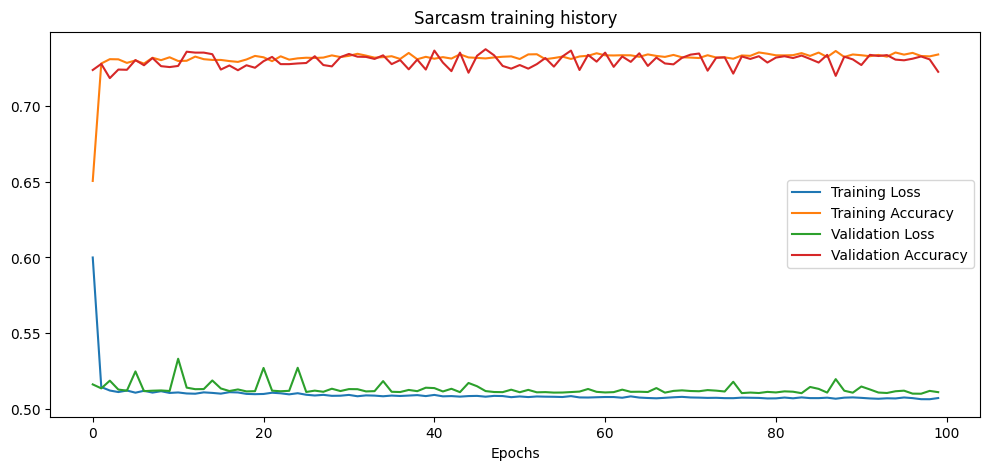

In [11]:
model.summary()

print(history.history.keys())

plt.figure(figsize=(12,5))
plt.title("Sarcasm training history")

plt.xlabel("Epochs")

x = history.epoch
plt.plot(x,history.history['loss'])
plt.plot(x,history.history['accuracy'])
plt.plot(x,history.history['val_loss'])
plt.plot(x,history.history['val_accuracy'])


plt.legend(["Training Loss", "Training Accuracy", "Validation Loss", "Validation Accuracy"])

plt.show()

In [12]:
def test_level_of_sarcasm(sentence):
    test_seq_pad = pad_sequences(tokenizer.texts_to_sequences([sentence]),maxlen=max_length, padding='post')
    predictions = model.predict(test_seq_pad)
    lvl = int(predictions[0][0]*100)
    print(f"Percent Sarcasm: {lvl}%")

test_level_of_sarcasm("grandfather tries to make first fall as cool-looking as possible")

1/1 [==============================] - 1s 501ms/step
Percent Sarcasm: 55%


In [14]:
# save the model
model.save("model/sarcasm_level.h5")

#save tokenizer
tokenizer_json = tokenizer.to_json()
with open('tokenizers/sarcasm_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer_json)